# Execute the code below

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather['DAY_OF_YEAR'] = df_weather.index+1
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,DAY_OF_YEAR
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,...,116,143,176,0,1,5.1,very bad,1,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,...,119,116,116,0,1,8.7,very bad,1,2,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,...,116,116,116,0,1,8.7,very bad,1,3,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,...,116,116,122,0,1,5.1,very bad,1,4,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,...,143,116,116,0,1,8.7,very bad,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,...,119,143,116,0,1,8.7,not good not bad,12,27,361
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,...,143,116,116,0,1,6.9,very bad,12,28,362
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,...,116,116,116,0,1,8.7,very bad,12,29,363
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,...,113,113,113,0,1,8.7,very bad,12,30,364


# Correlation Matrix
Find the most correlated column with MAX Temperature

In [3]:
# Did you know that you can have a correlation heatmap with a simple line ?

"df_weather.corr().style.background_gradient(cmap='coolwarm').set_precision(2)"

# Now, find the most correlated column with MAX Temperature

corr_matrix = df_weather.corr()

# find the column with the highest correlation to MAX Temperature

max_temp_corr = corr_matrix['MAX_TEMPERATURE_C'].drop('MAX_TEMPERATURE_C').idxmax()

print(f"The column with the highest correlation to MAX Temperature is {max_temp_corr}.")

The column with the highest correlation to MAX Temperature is HEATINDEX_MAX_C.


# ScatterPlot
Draw a scatterplot with MAX Temperature on Y-axis, and the most correlated column on X-axis

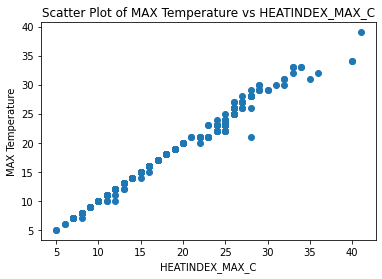

In [4]:
# Hop !

# create the scatter plot
plt.scatter(df_weather[max_temp_corr], df_weather['MAX_TEMPERATURE_C'])
plt.xlabel(max_temp_corr)
plt.ylabel('MAX Temperature')
plt.title('Scatter Plot of MAX Temperature vs ' + max_temp_corr)

# show the plot
plt.show()


# Univariate linear regression with NumPy

## Find the equation

In [5]:
# NumPy can find the coefficients of the linear regression

# First of all, you have to define 2 series :
# X-axis : the most correlated column, that you found above
Xaxis = df_weather[max_temp_corr] # Complete with your column

# Y-axis : the column to predict, so Max Temperature here
Yaxis = df_weather['MAX_TEMPERATURE_C']



In [6]:
# Then, NumPy calculate automatically coefficient. You just have to execute this code.

model = np.polyfit(x = Xaxis, y = Yaxis, deg = 1)


print("What's the type of this model ?, ", type(model))
print("What's inside ?, ", model)
print("\nHow can I read it ? \nDo you know linear function equation : f(x) = ax + b ? That's it !")
print(round(model[0], 3) ," * x  +  ", round(model[1], 3) )

What's the type of this model ?,  <class 'numpy.ndarray'>
What's inside ?,  [0.93721643 0.74475835]

How can I read it ? 
Do you know linear function equation : f(x) = ax + b ? That's it !
0.937  * x  +   0.745


## Prediction

In [7]:
# You can "predict" the Max Temperature from your column and the equation
# For example, let's try if your column value is 21.

# Hand calculation :
print("By hand :", model[0] * 21 + model[1] )

# With a NumPy function :
print("NumPy :  ", np.poly1d(model)(21)   )

# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [12, 21, 30]
print("NumPy list of values :  ", np.poly1d(model)(listtest)   )

By hand : 20.426303380116146
NumPy :   20.426303380116146
NumPy list of values :   [11.99135551 20.42630338 28.86125125]


## Scatterplot and linear regression on the same chart

In [8]:
# You have to define your Min and Max value for the X-axis
Xmin = Xaxis.min()
Xmax = Xaxis.max()  # Complete this code

# We generate an array with a range of values between your min and max values
array = np.arange(Xmin, Xmax)

In [9]:
# Please display your array. Just execute the code below:
array

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40])

In [10]:
# Please display prediction based on the array-values. Just execute the code below:
np.poly1d(model)(array)

array([ 5.4308405 ,  6.36805693,  7.30527336,  8.24248979,  9.17970622,
       10.11692265, 11.05413908, 11.99135551, 12.92857194, 13.86578837,
       14.8030048 , 15.74022123, 16.67743766, 17.61465409, 18.55187052,
       19.48908695, 20.42630338, 21.36351981, 22.30073624, 23.23795267,
       24.1751691 , 25.11238553, 26.04960196, 26.98681839, 27.92403482,
       28.86125125, 29.79846768, 30.73568411, 31.67290054, 32.61011697,
       33.5473334 , 34.48454983, 35.42176626, 36.35898269, 37.29619912,
       38.23341555])

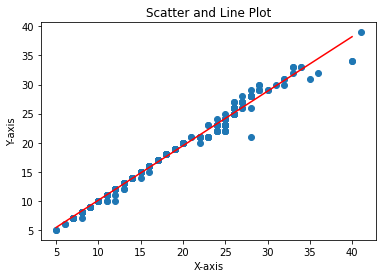

In [13]:
# On the same chart, draw : 
#         the same scatterplot than above, in blue
#         a red line plot with the array on X-axis and prediction based on the array-values on Y-axis (use np.poly1d function, as previously)
# It's your turn now :

plt.scatter(df_weather[max_temp_corr], df_weather['MAX_TEMPERATURE_C'])
plt.plot(array, np.poly1d(model)(array), color='red')

# set the X-label and Y-label
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# set the plot title
plt.title('Scatter and Line Plot')

plt.show()

## Compare it with Seaborn
Draw a [regplot with Seaborn](https://seaborn.pydata.org/generated/seaborn.regplot.html), and compare your charts. It's simpler with Seaborn, but you can't access to the coeffeicient...

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


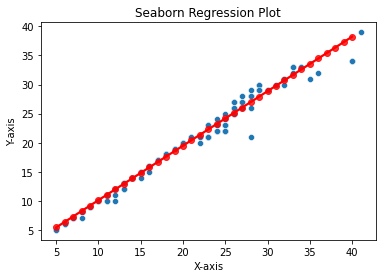

In [16]:
# Your code for the regplot with seaborn here :

import seaborn as sns

# create a scatter plot with a regression line using Seaborn
sns.scatterplot(df_weather[max_temp_corr], df_weather['MAX_TEMPERATURE_C'])
sns.regplot(array, np.poly1d(model)(array), color='red')

# set the X-label and Y-label
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# set the plot title
plt.title('Seaborn Regression Plot')

# show the plot
plt.show()

# Polynomial regression

## Create a new model, similar to the previous model, but the X-axis has to be 'Day of the year' column. Y-axis is unchanged (Max Temperature).

Here is an example of expected chart :

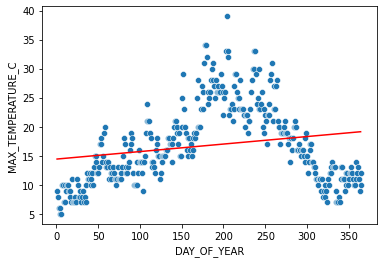


In [21]:
# Follow the same step as previously, to obtain a chart with :
#       blue scatterplot with real values
#       red lineplot with predicted values (linear regression)
#       'Day of the year' on X-axis
#       Max temperature on Y-axis
# Be carefull : we change the X-axis, so you have to define one more time variables Xaxis, Xmin, Xmax and array before create your "polymodel" with "polyfit"


X_axis = df_weather["DAY_OF_YEAR"] # Complete with your column

# Y-axis : the column to predict, so Max Temperature here
Y_axis = df_weather['MAX_TEMPERATURE_C']

polymodel = np.polyfit(x = X_axis, y = Y_axis, deg = 1  )

# You have to define your Min and Max value for the X-axis
X_min = X_axis.min()
X_max = X_axis.max()  # Complete this code

# We generate an array with a range of values between your min and max values
array = np.arange(X_min, X_max)

In [19]:
# Please display prediction based on the array-values. Just execute the code below:
np.poly1d(polymodel)(array)

array([14.45627667, 14.46921448, 14.4821523 , 14.49509011, 14.50802793,
       14.52096574, 14.53390355, 14.54684137, 14.55977918, 14.572717  ,
       14.58565481, 14.59859263, 14.61153044, 14.62446826, 14.63740607,
       14.65034388, 14.6632817 , 14.67621951, 14.68915733, 14.70209514,
       14.71503296, 14.72797077, 14.74090859, 14.7538464 , 14.76678422,
       14.77972203, 14.79265984, 14.80559766, 14.81853547, 14.83147329,
       14.8444111 , 14.85734892, 14.87028673, 14.88322455, 14.89616236,
       14.90910017, 14.92203799, 14.9349758 , 14.94791362, 14.96085143,
       14.97378925, 14.98672706, 14.99966488, 15.01260269, 15.0255405 ,
       15.03847832, 15.05141613, 15.06435395, 15.07729176, 15.09022958,
       15.10316739, 15.11610521, 15.12904302, 15.14198084, 15.15491865,
       15.16785646, 15.18079428, 15.19373209, 15.20666991, 15.21960772,
       15.23254554, 15.24548335, 15.25842117, 15.27135898, 15.28429679,
       15.29723461, 15.31017242, 15.32311024, 15.33604805, 15.34

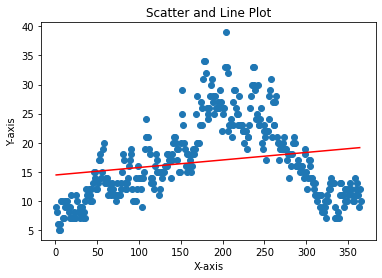

In [20]:
plt.scatter(df_weather["DAY_OF_YEAR"], df_weather['MAX_TEMPERATURE_C'])
plt.plot(array, np.poly1d(polymodel)(array), color='red')

# set the X-label and Y-label
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# set the plot title
plt.title('Scatter and Line Plot')

plt.show()

## It doesn't seem a good prediction ? Let's try to change the degree (deg argument of the polyfit function)
[More information here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

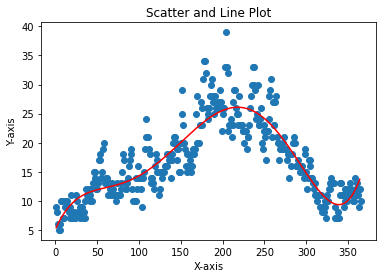

In [48]:
# Copy-paste your code, and just change the "deg" argument to find a better value

polymodel = np.polyfit(x = X_axis, y = Y_axis, deg = 5)

# You have to define your Min and Max value for the X-axis
X_min = X_axis.min()
X_max = X_axis.max()  # Complete this code

# We generate an array with a range of values between your min and max values
array = np.arange(X_min, X_max)


plt.scatter(df_weather["DAY_OF_YEAR"], df_weather['MAX_TEMPERATURE_C'])
plt.plot(array, np.poly1d(polymodel)(array), color='red')

# set the X-label and Y-label
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# set the plot title
plt.title('Scatter and Line Plot')

plt.show()

## Calculate the predicted Max temperature for the day 171
You have to calculate twice :
- by hand
- with numpy function

In [49]:
# Your code here

# Hand calculation :
print("By hand :", polymodel[0] * 171**5 + polymodel[1] * 171**4 + polymodel[2] * 171**3 + polymodel[3] * 171**2 + polymodel[4] * 171**1 + polymodel[5])

# With a NumPy function :
print("NumPy :  ", np.poly1d(polymodel)(171))

By hand : 22.795080630604833
NumPy :   22.795080630604833


# Yes, you did it ! Now, let's save our work in the DataFrame

## Create a new column in the DataFrame, and find a way to write in this column the predicted values corresponding to the Day of the year column. This method could be usefull to fill missing values or outliers for example.


In [52]:
# define a function to generate predictions using the polynomial model
def predict(day):
    return np.poly1d(polymodel)(day)

# apply the function to create a new column with predicted values
df_weather['Predicted Values'] = df_weather["DAY_OF_YEAR"].apply(predict)


df_weather.head()


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,DAY_OF_YEAR,Predicted Values
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,143,176,0,1,5.1,very bad,1,1,1,5.384677
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,116,116,0,1,8.7,very bad,1,2,2,5.691234
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,116,116,0,1,8.7,very bad,1,3,3,5.986528
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,116,122,0,1,5.1,very bad,1,4,4,6.270864
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,116,116,0,1,8.7,very bad,1,5,5,6.544543
